##  Analysis of 2020 COVID-19 Data for Albania

## The Data Used for this Notebook is from European Centre for Disease Prevention and Control
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide 

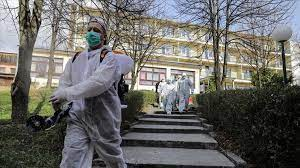[COVID-19 PANDEMIC](https://www.google.com/imgres?imgurl=https%3A%2F%2Fcdnuploads.aa.com.tr%2Fuploads%2FContents%2F2021%2F01%2F02%2Fthumbs_b_c_09d460dec360b4aa7a11217e38b8a76b.jpg%3Fv%3D215329&imgrefurl=https%3A%2F%2Fwww.aa.com.tr%2Fen%2Flatest-on-coronavirus-outbreak%2Falbania-reports-268-new-cases-of-covid-19%2F2096585&tbnid=W3CNIklMPnugZM&vet=12ahUKEwjVnqTIjrTwAhWxL1kFHd-1CzwQMygIegUIARCTAQ..i&docid=OV1KQ0oNqIeQlM&w=864&h=486&q=albania%20covid-19&ved=2ahUKEwjVnqTIjrTwAhWxL1kFHd-1CzwQMygIegUIARCTAQ)

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_excel('s3://picha-ia241-2021spring/COVID-19-geographic-disbtribution-worldwide-2020-12-14 (1).xls')

In [10]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [15]:
albania=df.loc[df['countriesAndTerritories']== 'Albania']

In [16]:
albania.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
340,2020-12-14,14,12,2020,788,14,Albania,AL,ALB,2862427.0,Europe,380.970414
341,2020-12-13,13,12,2020,879,12,Albania,AL,ALB,2862427.0,Europe,382.612378
342,2020-12-12,12,12,2020,802,12,Albania,AL,ALB,2862427.0,Europe,370.943958
343,2020-12-11,11,12,2020,873,14,Albania,AL,ALB,2862427.0,Europe,365.459102
344,2020-12-10,10,12,2020,752,15,Albania,AL,ALB,2862427.0,Europe,357.878122


## 1. Average Number of COVID-19 Cases in Albania for October 2020

In [18]:
alb_october = albania.loc[albania['month']== 8]

In [19]:
alb_october['cases'].describe()

count     31.000000
mean     134.935484
std       23.416427
min       79.000000
25%      121.500000
50%      139.000000
75%      154.000000
max      178.000000
Name: cases, dtype: float64

In [21]:
albania_and_greece = df.loc[df['countriesAndTerritories'].isin(['Albania', 'Greece'])]

In [22]:
albania_greece_october = albania_and_greece.loc[albania_and_greece['month']==8]

In [24]:
comparison = albania_greece_october.groupby('countriesAndTerritories').sum()['cases']

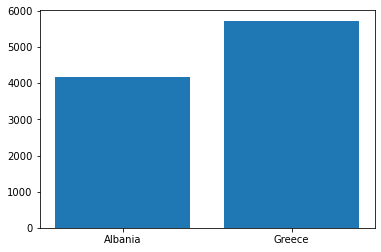

In [25]:
plt.bar(['Albania','Greece'],comparison)
plt.show()

In [ ]:
## The graph above displays the average number of cases in Albania in the month of October 2020 which is 134.94 per day.

## 2. What Month Did Albania have the Highest Number of Cases?

In [26]:
sum_cases_per_month = albania.groupby('month').sum()['cases']

In [27]:
sum_cases_per_month

month
3       223
4       543
5       356
6      1344
7      2731
8      4183
9      4138
10     7116
11    16991
12    10905
Name: cases, dtype: int64

<AxesSubplot:xlabel='month'>

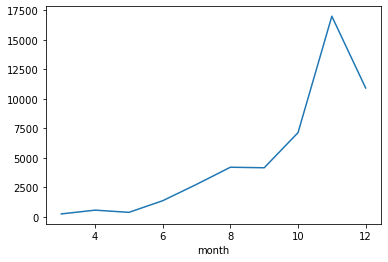

In [28]:
sum_cases_per_month.plot()

In [29]:
# As shown above, November had the nighest number of cases with a total of 16,991

## What was the Average Death Toll in Albania in 2020?

In [30]:
deaths_during_year=df.groupby('month').sum()['deaths']

In [31]:
deaths_during_year.sum()

1612833

In [32]:
deaths_during_year.describe()

count        12.000000
mean     134402.750000
std       81460.707266
min         213.000000
25%      109505.250000
50%      156877.000000
75%      179227.000000
max      271086.000000
Name: deaths, dtype: float64

<AxesSubplot:xlabel='month'>

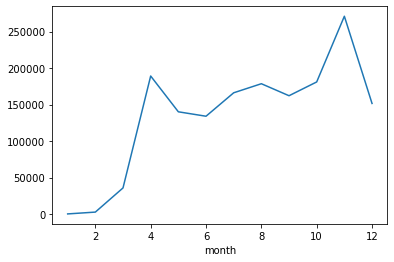

In [33]:
deaths_during_year.plot()

In [34]:
##Albania suffered a total of 1,612,833 deaths in 2020,an average of 134,402.75 during the months of March through December.